# Predicting Hotel Booking Cancellation

---

In [1]:
#importing Libraries
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\vamsh\AppData\Local\Temp\ipykernel_10392\469505763.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd

KeyboardInterrupt



In [2]:
#importing Dataset
booking_data = pd.read_csv(r"hotel_bookings.csv")

## EDA and DATA Cleaning

In [3]:
booking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
booking_data.shape

(119390, 32)

In [5]:
booking_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
#Dataset Basic Information
print(booking_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
booking_data['reservation_status_date'] = pd.to_datetime(booking_data['reservation_status_date'])

In [21]:
#to have a statistical measures like mean, min, max
booking_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [51]:
booking_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [23]:
booking_data[['is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number',
              'arrival_date_day_of_month','reservation_status_date', 'stays_in_weekend_nights', 'stays_in_week_nights']]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reservation_status_date,stays_in_weekend_nights,stays_in_week_nights
0,0,342,2015,July,27,1,2015-07-01,0,0
1,0,737,2015,July,27,1,2015-07-01,0,0
2,0,7,2015,July,27,1,2015-07-02,0,1
3,0,13,2015,July,27,1,2015-07-02,0,1
4,0,14,2015,July,27,1,2015-07-03,0,2
...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2017-09-06,2,5
119386,0,102,2017,August,35,31,2017-09-07,2,5
119387,0,34,2017,August,35,31,2017-09-07,2,5
119388,0,109,2017,August,35,31,2017-09-07,2,5


In [28]:
booking_data[booking_data['is_canceled']==1][['is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number',
              'arrival_date_day_of_month','reservation_status_date','reservation_status','stays_in_weekend_nights','stays_in_week_nights']]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reservation_status_date,reservation_status,stays_in_weekend_nights,stays_in_week_nights
8,1,85,2015,July,27,1,2015-05-06,Canceled,0,3
9,1,75,2015,July,27,1,2015-04-22,Canceled,0,3
10,1,23,2015,July,27,1,2015-06-23,Canceled,0,4
27,1,60,2015,July,27,1,2015-05-11,Canceled,2,5
32,1,96,2015,July,27,1,2015-05-29,Canceled,2,8
...,...,...,...,...,...,...,...,...,...,...
110280,1,132,2017,April,17,25,2017-04-25,Canceled,0,0
111355,1,4,2017,June,23,5,2017-06-05,Canceled,1,0
111924,1,7,2017,May,22,31,2017-05-31,Canceled,0,1
111925,1,6,2017,July,29,17,2017-07-17,No-Show,1,0


In [16]:
df = booking_data.copy(deep=True)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
df[['previous_cancellations', 'previous_bookings_not_canceled', 'agent', 'company']]

,previous_cancellations,previous_bookings_not_canceled,agent,company
0,0,0,NaN,NaN
1,0,0,NaN,NaN
2,0,0,NaN,NaN
3,0,0,304.0,NaN
4,0,0,240.0,NaN
...,...,...,...,...
119385,0,0,394.0,NaN
119386,0,0,9.0,NaN
119387,0,0,9.0,NaN
119388,0,0,89.0,NaN


In [30]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Percent of the null values in above columns:

In [34]:
cols = ['children', 'country', 'agent', 'company']

for col in cols:
    print(f"{col}: {round((df[col].isna().sum()/df.shape[0])*100, 4)} %")

children: 0.0034 %
country: 0.4087 %
agent: 13.6862 %
company: 94.3069 %


As company column has not much data present in it, it can be dropped from the analysis.

In [35]:
df.drop(['company'], axis=1, inplace=True)

In [78]:
rows_to_drop = df[df['children'].isna() == True]['children'].index
df.drop(index = rows_to_drop, inplace = True)

In [79]:
rows_to_drop = df[df['country'].isna() == True]['country'].index
df.drop(index = rows_to_drop, inplace = True)

In [80]:
df.shape[0]

118898

In [82]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16004
days_in_waiting_list                  0


In [84]:
df['agent'].value_counts()

agent
9.0      31959
240.0    13871
1.0       7191
14.0      3638
7.0       3539
         ...  
70.0         1
93.0         1
54.0         1
497.0        1
59.0         1
Name: count, Length: 332, dtype: int64

In [85]:
df[['market_segment','distribution_channel','agent']]

,market_segment,distribution_channel,agent
0,Direct,Direct,NaN
1,Direct,Direct,NaN
2,Direct,Direct,NaN
3,Corporate,Corporate,304.0
4,Online TA,TA/TO,240.0
...,...,...,...
119385,Offline TA/TO,TA/TO,394.0
119386,Online TA,TA/TO,9.0
119387,Online TA,TA/TO,9.0
119388,Online TA,TA/TO,89.0


In [86]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [87]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: count, dtype: int64

In [111]:
df[df['agent'].isnull()].groupby(['distribution_channel']).count()['hotel'].reset_index()

,distribution_channel,hotel
0,Corporate,5366
1,Direct,7480
2,GDS,2
3,TA/TO,3155
4,Undefined,1


In [109]:
df[df['agent'].isnull()].groupby(['market_segment','distribution_channel']).count()['hotel'].reset_index()

,market_segment,distribution_channel,hotel
0,Aviation,Corporate,204
1,Aviation,TA/TO,8
2,Complementary,Corporate,73
3,Complementary,Direct,540
4,Complementary,TA/TO,18
5,Corporate,Corporate,3941
6,Corporate,Direct,159
7,Corporate,TA/TO,319
8,Direct,Corporate,71
9,Direct,Direct,5631


In [119]:
df[df['agent'].notnull()]['agent'].unique().min(), df[df['agent'].notnull()]['agent'].unique().max()

(1.0, 535.0)

In [120]:
df.loc[df['agent'].isna(),'agent'] = 0

In [122]:
df['agent'].isna().sum()

0

In [123]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

### Check for variability in the dataset

In [48]:
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
        
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [53]:
for col in cat_cols:
    print(df[col].value_counts())
    print('-'*30)

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
------------------------------
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64
------------------------------
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
------------------------------
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64
------------------------------
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count,

We can identify variability in all categorical columns. However, country column has to be explored in detail.

In [54]:
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [55]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [65]:
dict_ctry = {'country':[], 'bookings':[]}
for value in df['country'].unique():
    dict_ctry['country'].append(value)
    dict_ctry['bookings'].append(df[df['country'] == value].shape[0])
    
df_ctry = pd.DataFrame(dict_ctry)
df_ctry

,country,bookings
0,PRT,48590
1,GBR,12129
2,USA,2097
3,ESP,8568
4,IRL,3375
...,...,...
173,KIR,1
174,SDN,1
175,ATF,1
176,SLE,1


-----

## Exploratory Data Analysis

In [129]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from matplotlib.lines import Line2D

In [130]:
num_cols = []
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        num_cols.append(col)
        
num_cols

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

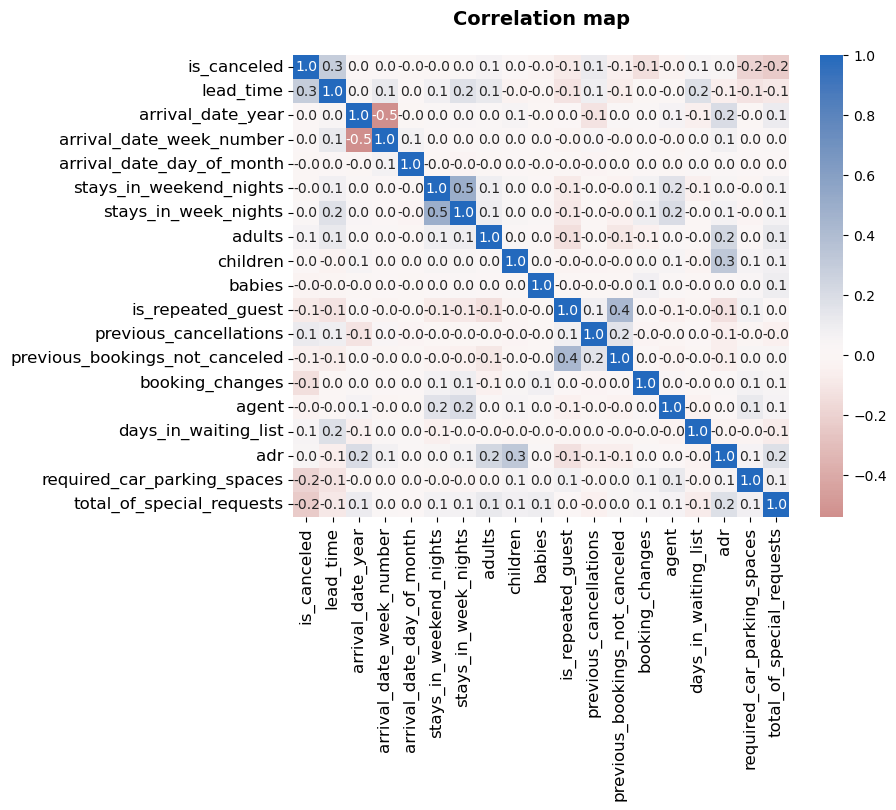

In [134]:
df_corr = df[num_cols].corr()

# correlation plot
plt.figure(figsize = [8, 6])
sb.heatmap(df_corr, annot = True, fmt = '.1f', cmap = 'vlag_r', center = 0)
plt.title('Correlation map\n', weight = 'bold', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

NO significant correlation between any variables.

In [28]:
booking_data[booking_data['is_canceled']==1][['is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number',
              'arrival_date_day_of_month','reservation_status_date','reservation_status','stays_in_weekend_nights','stays_in_week_nights']]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reservation_status_date,reservation_status,stays_in_weekend_nights,stays_in_week_nights
8,1,85,2015,July,27,1,2015-05-06,Canceled,0,3
9,1,75,2015,July,27,1,2015-04-22,Canceled,0,3
10,1,23,2015,July,27,1,2015-06-23,Canceled,0,4
27,1,60,2015,July,27,1,2015-05-11,Canceled,2,5
32,1,96,2015,July,27,1,2015-05-29,Canceled,2,8
...,...,...,...,...,...,...,...,...,...,...
110280,1,132,2017,April,17,25,2017-04-25,Canceled,0,0
111355,1,4,2017,June,23,5,2017-06-05,Canceled,1,0
111924,1,7,2017,May,22,31,2017-05-31,Canceled,0,1
111925,1,6,2017,July,29,17,2017-07-17,No-Show,1,0


In [135]:
booking_data[booking_data['is_canceled']==0][['is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number',
              'arrival_date_day_of_month','reservation_status_date','reservation_status','stays_in_weekend_nights','stays_in_week_nights']]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reservation_status_date,reservation_status,stays_in_weekend_nights,stays_in_week_nights
0,0,342,2015,July,27,1,2015-07-01,Check-Out,0,0
1,0,737,2015,July,27,1,2015-07-01,Check-Out,0,0
2,0,7,2015,July,27,1,2015-07-02,Check-Out,0,1
3,0,13,2015,July,27,1,2015-07-02,Check-Out,0,1
4,0,14,2015,July,27,1,2015-07-03,Check-Out,0,2
...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2017-09-06,Check-Out,2,5
119386,0,102,2017,August,35,31,2017-09-07,Check-Out,2,5
119387,0,34,2017,August,35,31,2017-09-07,Check-Out,2,5
119388,0,109,2017,August,35,31,2017-09-07,Check-Out,2,5


As reservation_status_date variable does not have any influence in the cacellation of the booking, it is removed from the further analysis.

In [136]:
columns_to_drop = ['reservation_status_date']
df.drop(columns = columns_to_drop, inplace = True)

In [137]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

# `Task - 1`

In [210]:
def categorical_bar_plot(df, col):
    cats = len(df[col].unique())
    length, breath, size, rotation = math.ceil((cats/2)*2), math.ceil((cats/3)*1.5), math.ceil(((cats/2)*4)/2), 90
    # Assign figure size and color palette
    if cats <= 4:
        length, breath, size, rotation = 4,3,10,0
    plt.figure(figsize=[length, breath])
    # sb.set_style("white")
    sb.set_style("darkgrid")
    sb.set_palette(palette = 'colorblind', n_colors = 10, desat = None)
    current_palette = sb.color_palette()
    base_color = sb.color_palette()[0]

    # prepare data for the plot
    var_order = df['is_canceled'].groupby(df[col]).mean().sort_values(ascending=False).index
    max_count = df[col].value_counts().max()
    tick_values = np.arange(0, max_count + 10000, 10000)
    tick_names = ['{:0.0f} K'.format(v/1000) for v in tick_values]

    # Seaborn's barplot
    sb.barplot(data = df, x = col, y = 'is_canceled', alpha= 0.5, color = base_color , order = var_order, errorbar=None);

    # improve plot aesthetics
    plt.title(f'Average cancellation rate based on {col}\n', fontsize = 12, weight='bold')
    plt.xlabel(f'{col}', fontsize = 12)
    plt.ylabel('Cancellation rate\n', fontsize = 12)
    plt.xticks(fontsize = 10, rotation=rotation)
    plt.yticks(fontsize = 10)

    # add annotations
    # -------------------------------------------------------
    n_points = 1
    var_counts = df['is_canceled'].groupby(df[col]).mean().sort_values(ascending=False)
    # get the current tick locations and labels
    locs, labels = plt.xticks()
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        try:
            # get the text property for the label to get the correct count
            count = var_counts[label.get_text()]
        except KeyError:
            count = 0
        if (100*count/n_points) < 1:
            pct_string = '< 1 %'
        else:
            pct_string = '{:0.0f} %'.format(100*count/n_points)
        # print the annotation depending on the bar length
        if count < (n_points/10):
            plt.text(loc, count + (n_points/15), pct_string, ha = 'center', color = 'black', fontsize = size)
        else:
            plt.text(loc, count - (n_points/20), pct_string, ha = 'center', color = 'black', fontsize = size);
    # -------------------------------------------------------
    sb.despine();

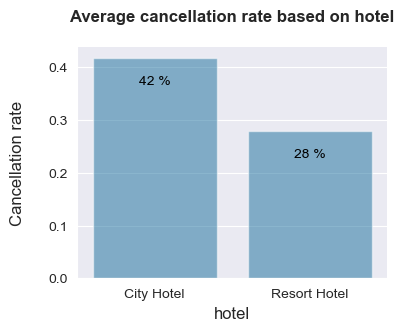

In [211]:
categorical_bar_plot(df, 'hotel')

In [212]:
cat_cols = ['hotel',
            'arrival_date_year',
             'arrival_date_month',
             'meal',
             'market_segment',
             'distribution_channel',
             'reserved_room_type',
             'assigned_room_type',
             'deposit_type',
             'customer_type']

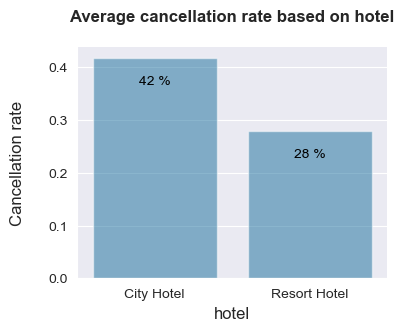

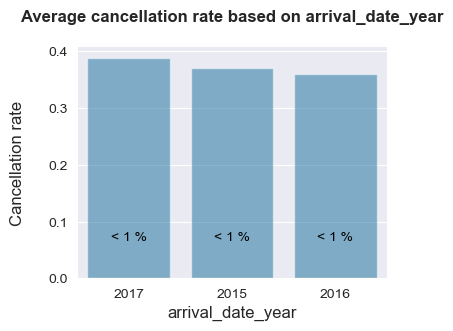

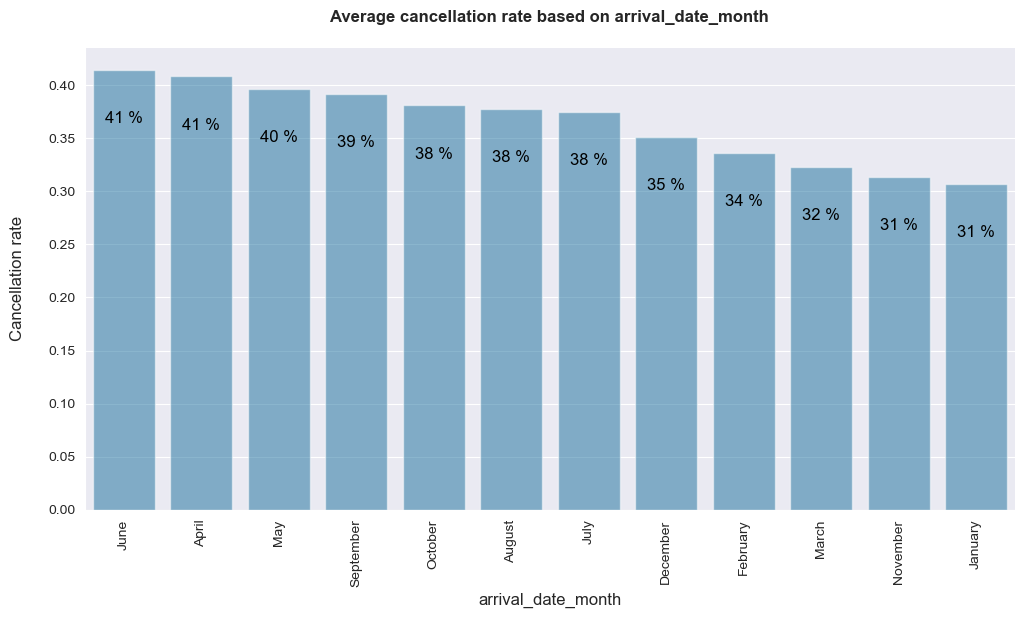

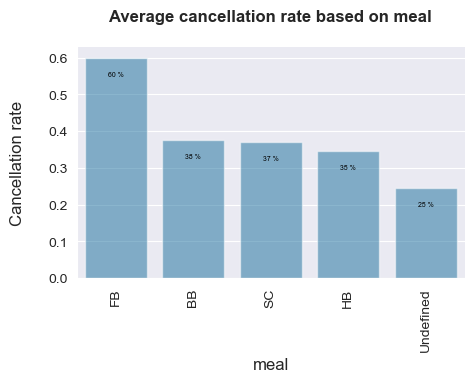

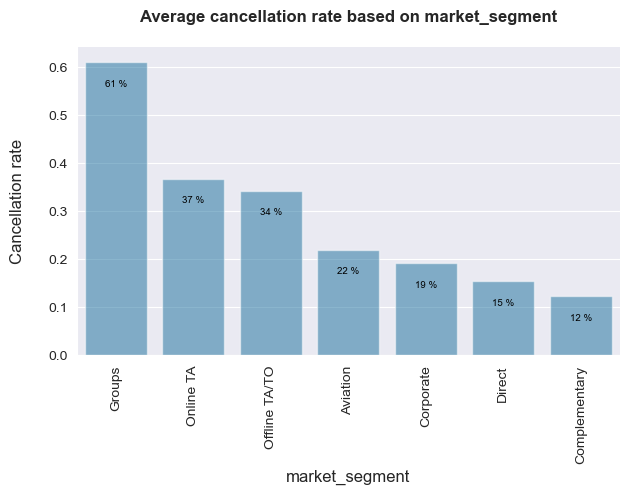

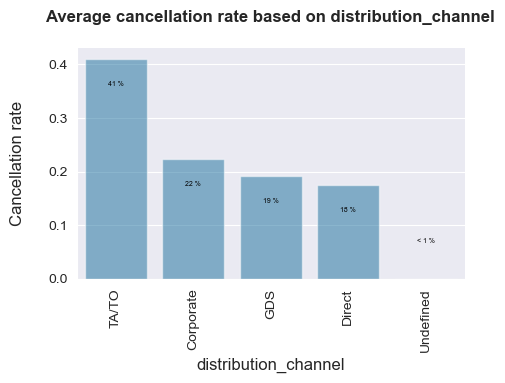

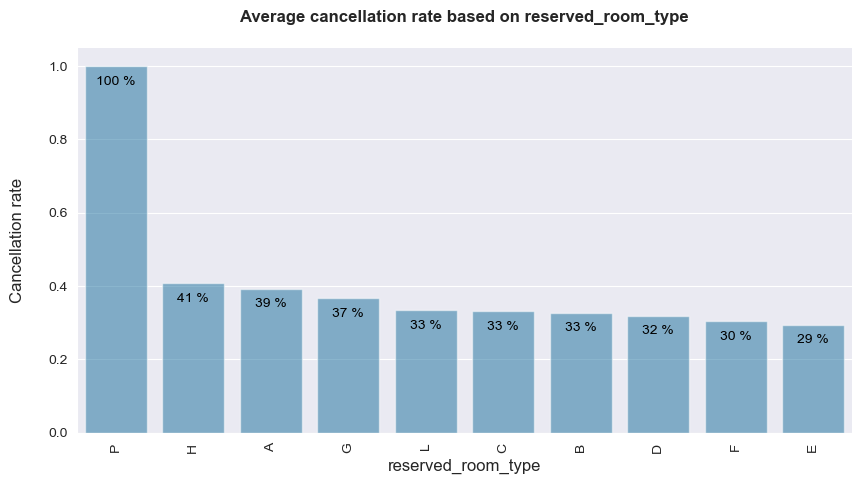

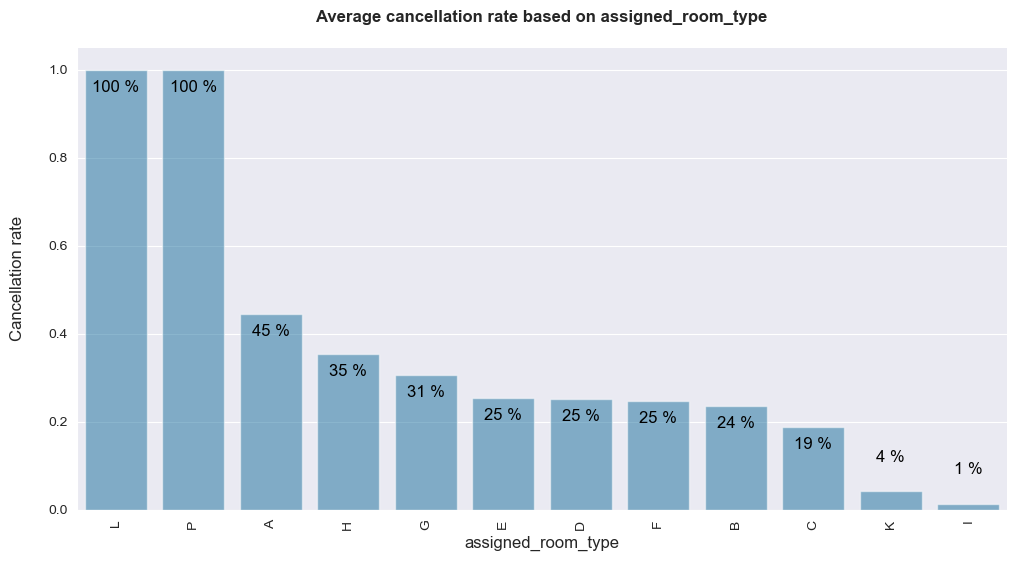

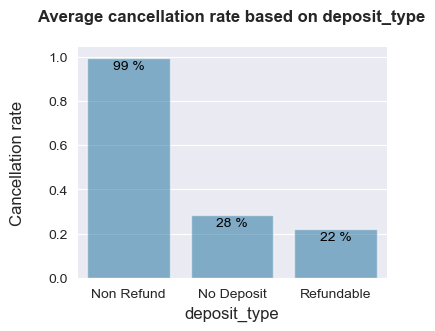

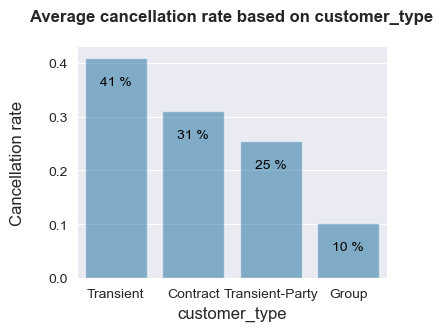

In [213]:
for col in cat_cols:
    categorical_bar_plot(df, col)

As we see from the above plots, year has no significance over cancellation rates. Hencewe are dropping 'arrival_date_year' from further analysis.

In [214]:
df.drop(['arrival_date_year'], axis=1, inplace=True)

As we are considering 'arrival_date_month', the column 'arrival_date_week_number' which potrays the same information can be removed as well.

In [216]:
df.drop(['arrival_date_week_number'], axis=1, inplace=True)

In [218]:
num_cols = ['is_canceled',
             'lead_time',
             'arrival_date_day_of_month',
             'stays_in_weekend_nights',
             'stays_in_week_nights',
             'adults',
             'children',
             'babies',
             'is_repeated_guest',
             'previous_cancellations',
             'previous_bookings_not_canceled',
             'booking_changes',
             'agent',
             'days_in_waiting_list',
             'adr',
             'required_car_parking_spaces',
             'total_of_special_requests']

In [246]:
def numerical_bar_plot(df, col):
    cats = len(df[col].unique())
    length, breath, size, rotation = math.ceil((cats/2)*2), math.ceil((cats/3)*1.5), math.ceil(((cats/2)*4)/2), 90
    # Assign figure size and color palette
    if cats <= 4:
        length, breath, size, rotation = 4,3,10,0
    plt.figure(figsize=[length, breath])
    # sb.set_style("white")
    sb.set_style("darkgrid")
    sb.set_palette(palette = 'colorblind', n_colors = 10, desat = None)
    current_palette = sb.color_palette()
    base_color = sb.color_palette()[0]

    # prepare data for the plot
    var_order = df['is_canceled'].groupby(df[col]).mean().sort_index(ascending=True).index
    max_count = df[col].value_counts().max()
    tick_values = np.arange(0, max_count + 10000, 10000)
    tick_names = ['{:0.0f} K'.format(v/1000) for v in tick_values]

    # Seaborn's barplot
    sb.barplot(data = df, x = col, y = 'is_canceled', alpha= 0.5, color = base_color , order = var_order, errorbar=None);

    # improve plot aesthetics
    plt.title(f'Average cancellation rate based on {col}\n', fontsize = 12, weight='bold')
    plt.xlabel(f'{col}', fontsize = 12)
    plt.ylabel('Cancellation rate\n', fontsize = 12)
    plt.xticks(fontsize = 10, rotation=rotation)
    plt.yticks(fontsize = 10)

    # add annotations
    # -------------------------------------------------------
    n_points = 1
    var_counts = df['is_canceled'].groupby(df[col]).mean().sort_index(ascending=True)
    # get the current tick locations and labels
    locs, labels = plt.xticks()
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):
        try:
            # get the text property for the label to get the correct count
            try:
                count = var_counts[int(label.get_text())]
            except ValueError:
                count = var_counts[float(label.get_text())]
        except KeyError:
            count = 0
        if (100*count/n_points) < 1:
            pct_string = '< 1 %'
        else:
            pct_string = '{:0.0f} %'.format(100*count/n_points)
        # print the annotation depending on the bar length
        if count < (n_points/10):
            plt.text(loc, count + (n_points/15), pct_string, ha = 'center', color = 'black', fontsize = size)
        else:
            plt.text(loc, count - (n_points/20), pct_string, ha = 'center', color = 'black', fontsize = size);
    # -------------------------------------------------------
    sb.despine();

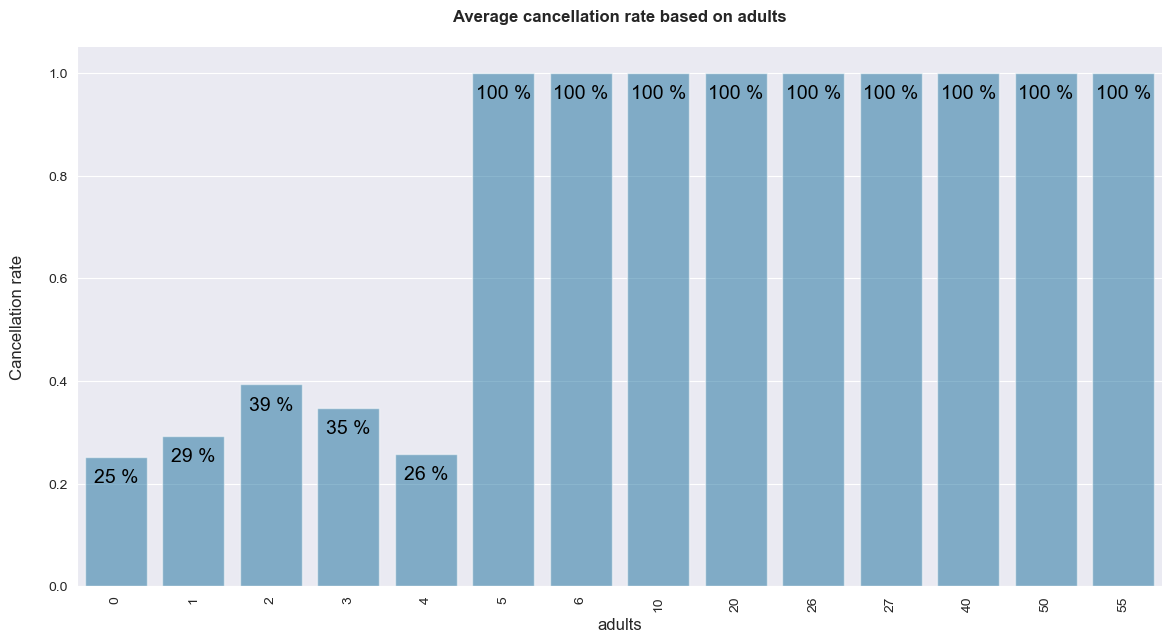

In [247]:
numerical_bar_plot(df, 'adults')

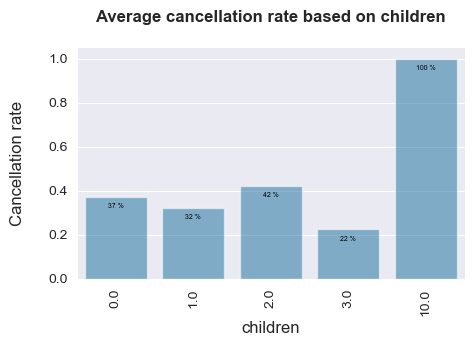

In [248]:
numerical_bar_plot(df, 'children')

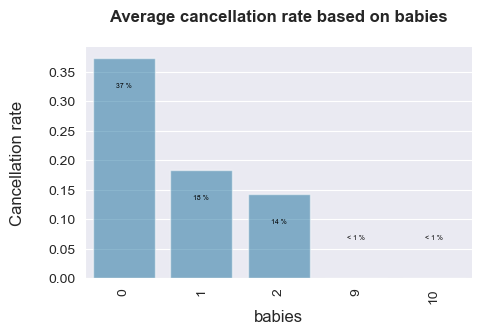

In [249]:
numerical_bar_plot(df, 'babies')

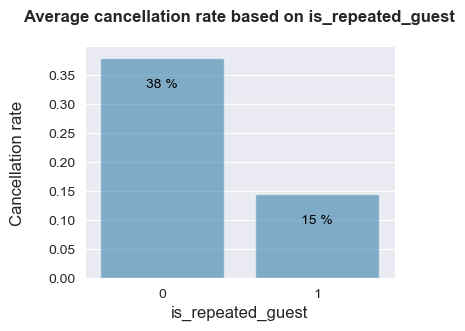

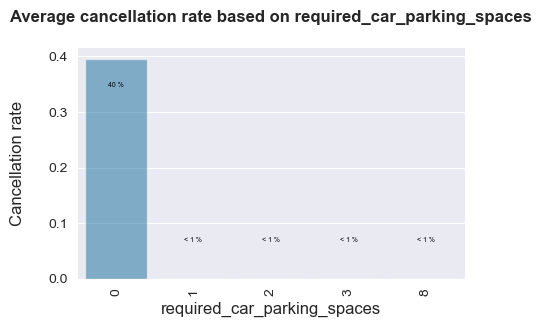

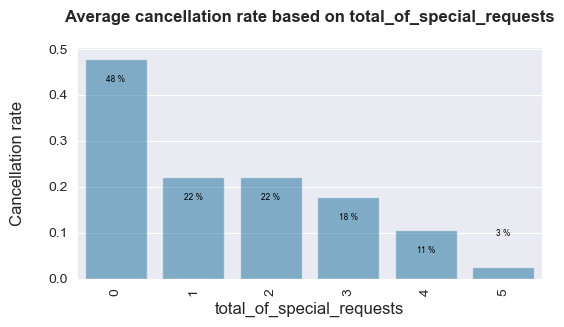

In [250]:
cols = ['is_repeated_guest',
        'required_car_parking_spaces',
        'total_of_special_requests']

for col in cols: 
    numerical_bar_plot(df, col)

-------

### categorical to numerical imputation

In [259]:
df_backup = df.copy(deep=True)

In [287]:
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
        
cat_cols

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [288]:
cat_cols = ['hotel',
             'meal',
             'country',
             'market_segment',
             'distribution_channel',
             'reserved_room_type',
             'assigned_room_type',
             'deposit_type',
             'customer_type',
             'reservation_status']

In [289]:
for col in cat_cols:
    filename = 'Jason/' + str(col) + '.json'
    with open(filename) as user_file:
        parsed_json = json.load(user_file)
    # print(parsed_json)
    # print('-'*30)
    
    unique_values = df[col].unique()
    for value in unique_values:
        df.loc[df[col] == value, col] = int(parsed_json[value])

In [290]:
for col in cat_cols:
    print(df[col].unique())
    print('-'*30)

[0 1]
------------------------------
[0 1 2 3 4]
------------------------------
[0 1 2 3 4 5 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177]
------------------------------
[0 1 2 3 4 5 7]
------------------------------
[0 1 2 3 4]
------------------------------
[0 1 2 3 4 5 6 7 9 8]
------------------------------
[0 1 2 3 4 5 6 7 8 10 11 9]
------------------------------
[0 1 2]
------------------------------
[0 1 2 3]
----------------------------

In [291]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [292]:
month_dict = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
              'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

col = 'arrival_date_month'
unique_values = df[col].unique()
for value in unique_values:
    df.loc[df[col] == value, col] = int(month_dict[value])

In [293]:
df['arrival_date_month'].unique()

array([7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6], dtype=object)

In [300]:
for col in cat_cols:
    df[col] = df[col].astype('int64')

In [307]:
df['children'] = df['children'].astype('int64')

In [309]:
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
        
cat_cols

[]

Since Agent does not have control over customer cancellations, the column 'agent' can be dropped from the further analysis.

In [303]:
df.drop(['agent'], axis=1, inplace=True)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  int64  
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_month              118898 non-null  int64  
 4   arrival_date_day_of_month       118898 non-null  int64  
 5   stays_in_weekend_nights         118898 non-null  int64  
 6   stays_in_week_nights            118898 non-null  int64  
 7   adults                          118898 non-null  int64  
 8   children                        118898 non-null  int64  
 9   babies                          118898 non-null  int64  
 10  meal                            118898 non-null  int64  
 11  country                         118898 non-null  int64  
 12  market_segment       

----

### Split the data into train and test datasets

In [334]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)

df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

### Standardization

In [335]:
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score
from datetime import datetime
import seaborn as sns
import numpy as np
import json
import time
import os

In [336]:
def normalisation(df):
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    # Fit and transform the DataFrame
    normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return normalized_df

In [337]:
df_train_transform = normalisation(df_train)
df_train_transform

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1.0,0.0,0.054274,0.181818,0.433333,0.0625,0.097561,0.04,0.000000,0.0,...,0.222222,0.181818,0.000000,0.0,0.0,0.000000,0.203726,0.0,0.0,0.0
1,1.0,1.0,0.054274,0.181818,0.933333,0.0000,0.073171,0.04,0.000000,0.0,...,0.333333,0.272727,0.000000,0.0,0.0,0.000000,0.318331,0.0,0.0,0.5
2,1.0,1.0,0.074627,0.363636,0.166667,0.0000,0.024390,0.04,0.000000,0.0,...,0.111111,0.090909,0.000000,0.0,0.0,0.000000,0.207560,0.0,0.0,0.5
3,1.0,0.0,0.004071,0.636364,0.366667,0.0625,0.048780,0.04,0.000000,0.0,...,0.111111,0.090909,0.000000,0.0,0.0,0.000000,0.190519,0.0,0.2,0.0
4,1.0,1.0,0.142469,0.909091,0.366667,0.1250,0.121951,0.04,0.333333,0.0,...,0.111111,0.090909,0.000000,0.0,0.0,0.000000,0.211492,0.0,0.6,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83223,1.0,1.0,0.404342,0.272727,0.433333,0.0625,0.048780,0.04,0.000000,0.0,...,0.111111,0.090909,0.000000,0.0,0.0,0.666667,0.186645,0.0,0.0,0.5
83224,1.0,1.0,0.043419,0.818182,0.833333,0.0625,0.097561,0.04,0.000000,0.0,...,1.000000,0.636364,0.000000,0.0,0.0,0.333333,0.213660,0.0,0.0,0.5
83225,1.0,0.0,0.142469,0.727273,0.900000,0.0000,0.024390,0.02,0.000000,0.0,...,0.111111,0.181818,0.047619,0.0,0.0,0.000000,0.138232,0.0,0.0,0.0
83226,1.0,1.0,0.587517,0.727273,0.233333,0.0000,0.073171,0.04,0.000000,0.0,...,0.111111,0.090909,0.000000,1.0,0.0,0.000000,0.147914,0.0,0.0,0.5


In [338]:
# Split in to X_train and y_train
y_train = df_train_transform.pop('is_canceled')
X_train = df_train_transform

In [339]:
# Split in to X_test and y_test
y_test = df_test.pop('is_canceled')
X_test = df_test

# `Task - 2`

In [340]:
# =============================================================
# == Segment 3: # Finding the best hyperparameters for SVC Model
# =============================================================
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Finding the best hyperparameters
params = {
    'C': [0.1,1],  # Penalty parameter C of the error term
    'gamma': [1,0.1],  # Kernel coefficient for 'rbf'
    'kernel': ['linear', 'rbf', 'poly']  # Specifies the kernel type (here, Radial Basis Function)
}

# Create a GridSearchCV object with SVC as the estimator
clf = GridSearchCV(
    estimator=SVC(),  # Support Vector Classifier
    param_grid=params,  # Hyperparameters grid to search over
    cv=2,  # K-fold cross-validation
    n_jobs=5,  # Number of parallel jobs to run (-1 uses all available processors)
    verbose=2  # Controls the verbosity: the higher, the more messages
)

# Fit the GridSearchCV object to the training data
clf.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(clf.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


# `Task - 3,4`

In [344]:
# ==============================================
# == Segment 3: # Building and fit the classifier
# ==============================================

def SVM_Model(X_train,y_train,X_test,y_test):
    #Import svm model
    from sklearn import svm
    # Create SVM Classifier with current kernel
    clf = svm.SVC(kernel='linear', gamma=1, C=0.1)
    # Start training time measurement
    start_train_time = time.time()
    # Train the model
    # Perform cross-validation
    clf.fit(X_train, y_train)
    # End training time measurement
    end_train_time = time.time()
    # Predict the response for test dataset
    start_inference_time = time.time()
    y_pred = clf.predict(X_test)
    end_inference_time = time.time()
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred)
    # Calculate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Calculate F1 Score
    f1 = f1_score(y_test, y_pred)
    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("AUC:", auc)
    print("Confusion Matrix:\n", cm)
    print("F1 Score:", f1)
    # Print training and inference times
    print("Training time:", end_train_time - start_train_time)
    print("Inference time:", end_inference_time - start_inference_time)
    # save the model to disk
    # filename = 'finalized_model.sav'
    # joblib.dump(clf, filename)

SVM_Model(X_train,y_train,X_test,y_test)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC: 1.0
Confusion Matrix:
 [[22519     0]
 [    0 13151]]
F1 Score: 1.0
Training time: 2.827582359313965
Inference time: 0.8863692283630371


----